# Training Models

## Linear Regression

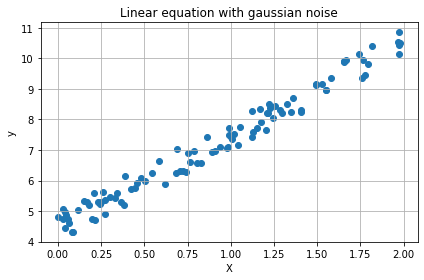

In [1]:
import numpy as np
from matplotlib import pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Linear equation with gaussian noise')

ax.grid(True)
ax.scatter(X, y)
fig.tight_layout()

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.48451996]
 [3.00102473]]


In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.48451996],
       [10.48656942]])

(0.0, 2.0, 0.0, 15.0)

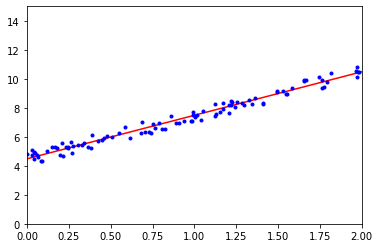

In [4]:
plt.plot(X_new, y_predict, 'r-', label='Regression')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])


In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.48451996]), array([[3.00102473]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.48451996],
       [10.48656942]])

In [7]:
np.linalg.lstsq(X_b, y, rcond=1e-6) # LinearRegression is based on this class, calculates Pseudoinv(X) times 'y'

(array([[4.48451996],
        [3.00102473]]),
 array([8.2577334]),
 2,
 array([14.00252639,  4.15598363]))

In [8]:
np.linalg.pinv(X_b).dot(y) # Psuedo inverse

array([[4.48451996],
       [3.00102473]])

## Batch Gradient Descent

In [9]:
def batchGD(X, y, theta =np.random.randn(2, 1), learning_rate = 0.1, iterations = 10000, batch_size = 100):
    
    for iteration in range(iterations):
        gradients = 2/batch_size * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate*gradients
        yield theta

In [10]:
def plotXYTheta(X, y, thetas, learning_rate, plot_rate=500):
    fig, ax = plt.subplots(layout='constrained')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title('learning rate= '+str(learning_rate))
    i = 0
    for theta in thetas:
        if i%plot_rate == 0:
            X_new = np.array([[0], [2]])
            X_new_b = np.c_[np.ones((2, 1)), X_new]
            y_predict = X_new_b.dot(theta)
            if i > 0:
                ax.plot(X_new, y_predict, 'b-')
            else:
                ax.plot(X_new, y_predict, 'r--')
        i += 1
    ax.plot(X, y, 'bo')

In [11]:
# For learning_rates = [0.02, 0.1 0.5]
theta_002 = batchGD(X_b, y, learning_rate = 0.02)
theta_01 = batchGD(X_b, y, learning_rate = 0.1)
theta_05 = batchGD(X_b, y, learning_rate = 0.5)

# plotXYTheta(X, y, theta_002, 0.02)
# plotXYTheta(X, y, theta_01, 0.1)
# plotXYTheta(X, y, theta_05, 0.5)

In [12]:
def stochasticGD(X, y, epochs=500, t0=5, t1=50, theta=np.random.randn(2, 1)):
    m = 1000
    
    def schedule(t):
        return t0/(t1+t)
    
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = schedule(epoch * m + i)
            theta = theta - eta * gradients
            yield theta
    return theta

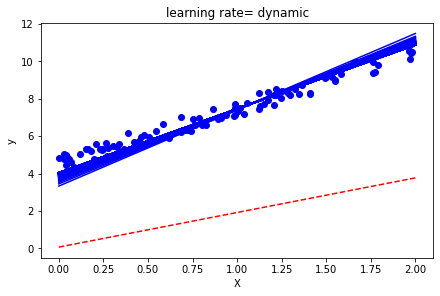

In [13]:
plotXYTheta(X, y, stochasticGD(X_b, y), plot_rate=2000, learning_rate = 'dynamic')

In [14]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgdr.fit(X, y.ravel())
sgdr.intercept_, sgdr.coef_

(array([4.4732176]), array([2.9982346]))

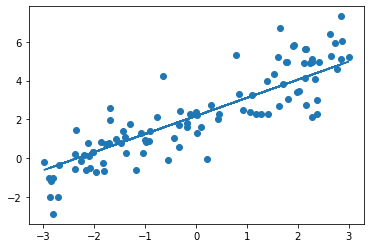

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.05* X ** 2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

plt.plot(X, sgdr.fit(X, y.ravel()).predict(X))

## Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([1.18031434]), array([1.18031434, 1.39314194]))

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10841209]), array([[1.07246023, 0.01926435]]))

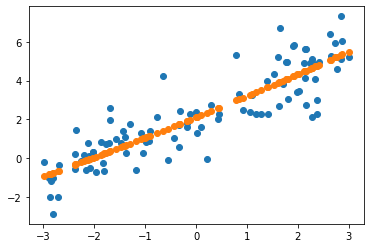

In [18]:
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(X_poly))

## Learning curves

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_err, test_err = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_err.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_err.append(mean_squared_error(y_test_predict, y_test))
    print(max(test_err), max(train_err))
    print(min(test_err), min(train_err))
    train_sizes = list(range(1, len(X_train)))
    plt.plot(train_sizes, np.sqrt(train_err), "r-+", linewidth=2, label="train")
    plt.plot(train_sizes, np.sqrt(test_err), "b-", linewidth=3, label="validation")
    plt.tight_layout()
    plt.ylim(0, 5)
    plt.legend()

9.475744140880229 1.6138159543807586
0.6884568986213352 0.0


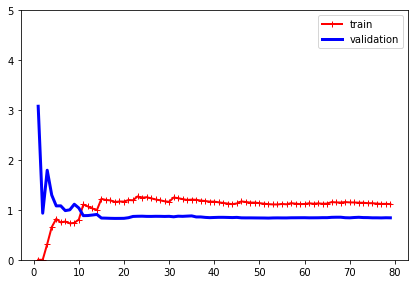

In [20]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

23710820094.61604 0.09849144538965551
0.07542718406981136 0.0


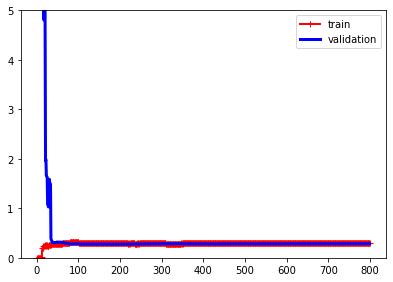

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

m = 1000
X = 2 * np.random.rand(m, 1) - 3
y = X/2 + 3 * X**2 + + 4 - np.random.rand(m, 1)
plot_learning_curve(polynomial_regression, X, y)

## Regularization

59.9227833837064 9.193099761874224
0.850381264651883 0.0


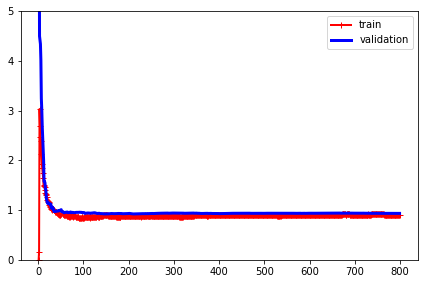

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
plot_learning_curve(ridge_reg, X, y)

/home/tejra/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


11.052224629632592 4.459878690115258
0.7677571323437482 0.036881101832760776


array([5.5663175])

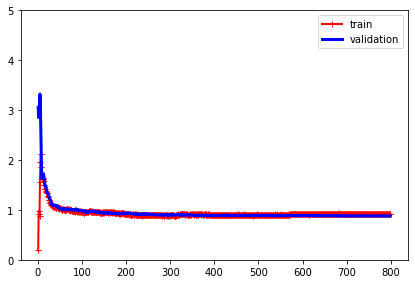

In [37]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
plot_learning_curve(sgd_reg, X, y.ravel())
sgd_reg.predict([X[0]])

/home/tejra/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


86.85932128959902 2.0178399969453995
1.21299405489379 0.0


array([6.72571924])

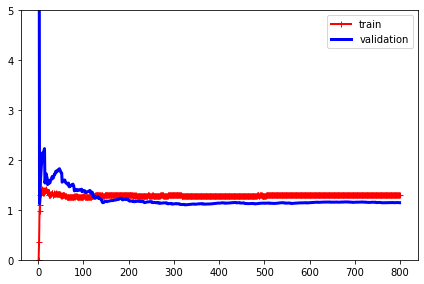

In [38]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X, y)
plot_learning_curve(lasso_reg, X, y)
lasso_reg.predict([X[0]])

/home/tejra/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


62.700396488007755 2.0981781987102237
1.1151561658765774 0.0


(array([6.88744798]), array([7.21113779]))

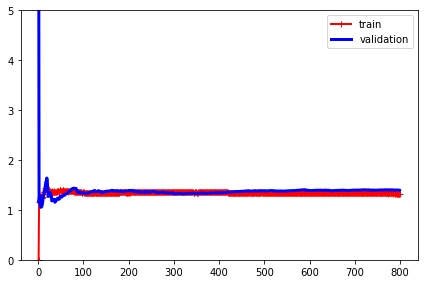

In [42]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X, y)
plot_learning_curve(enet, X, y)
enet.predict([X[0]]), y[0]

In [46]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

# Iris DataSet

In [62]:
from sklearn import datasets

iris = datasets.load_iris()

In [63]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
X = iris['data'][:, 3:] # petal widths
y = (iris['target'] == 2).astype(int)

In [76]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

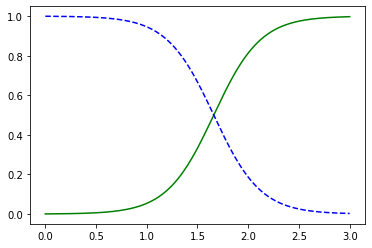

In [87]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Others')

array([0.        , 0.003003  , 0.00600601, 0.00900901, 0.01201201,
       0.01501502, 0.01801802, 0.02102102, 0.02402402, 0.02702703,
       0.03003003, 0.03303303, 0.03603604, 0.03903904, 0.04204204,
       0.04504505, 0.04804805, 0.05105105, 0.05405405, 0.05705706,
       0.06006006, 0.06306306, 0.06606607, 0.06906907, 0.07207207,
       0.07507508, 0.07807808, 0.08108108, 0.08408408, 0.08708709,
       0.09009009, 0.09309309, 0.0960961 , 0.0990991 , 0.1021021 ,
       0.10510511, 0.10810811, 0.11111111, 0.11411411, 0.11711712,
       0.12012012, 0.12312312, 0.12612613, 0.12912913, 0.13213213,
       0.13513514, 0.13813814, 0.14114114, 0.14414414, 0.14714715,
       0.15015015, 0.15315315, 0.15615616, 0.15915916, 0.16216216,
       0.16516517, 0.16816817, 0.17117117, 0.17417417, 0.17717718,
       0.18018018, 0.18318318, 0.18618619, 0.18918919, 0.19219219,
       0.1951952 , 0.1981982 , 0.2012012 , 0.2042042 , 0.20720721,
       0.21021021, 0.21321321, 0.21621622, 0.21921922, 0.22222